In [4]:
# Combining the scripts to load data and analyze unique pairings

import pandas as pd

def load_and_analyze_data(file_path):
    # Load the Excel file into a DataFrame
    df_processed = pd.read_excel(file_path)

    # Grouping by date, strain, time, and condition
    groupings = df_processed.groupby(['date', 'strain', 'time', 'cond']).size().reset_index(name='Count')

    return df_processed, groupings

# File path to the Excel file
file_path = r'C:\Users\mattt\Documents\mutants\biorep2\bacteria_data_processed.xlsx'

# Calling the function to load data and get unique pairings
df_processed, unique_pairings = load_and_analyze_data(file_path)

# Displaying the unique pairings
unique_pairings



,date,strain,time,cond,Count
0,20231214,LZ22225,10,inf,19
1,20231214,LZ22225,40,inf,280
2,20231227,LZ22225,0,inf,182
3,20231227,LZ22225,10,inf,167
4,20231227,LZ22225,20,inf,215
5,20231227,LZ22225,60,inf,496
6,20231227,LZ22228,0,uninf,341
7,20231227,LZ22228,10,inf,350
8,20231227,LZ22228,20,inf,1099
9,20231227,LZ22228,40,inf,426


In [9]:
# Grouping the data by 'date', 'strain', 'time', and 'cond' and calculating average, sum, and standard deviation
grouped_data_avg = df_processed.groupby(['date', 'strain', 'time', 'cond']).mean()
grouped_data_sum = df_processed.groupby(['date', 'strain', 'time', 'cond']).sum()
grouped_data_std = df_processed.groupby(['date', 'strain', 'time', 'cond']).std()

# Creating a new variable 'maximapercell' where the sum of MAXIMA is divided by the number of data points in each group

# calculate the number of data points in each group
group_count = df_processed.groupby(['date', 'strain', 'time', 'cond']).size()

# Creating the 'maximapercell' variable
grouped_data_sum['maximapercell'] = grouped_data_sum['MAXIMA'] / group_count






C:\Users\mattt\AppData\Local\Temp\ipykernel_9916\3947429610.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data_sum_reset, x='time', y='MAXIMA', hue='strain', ci=None,


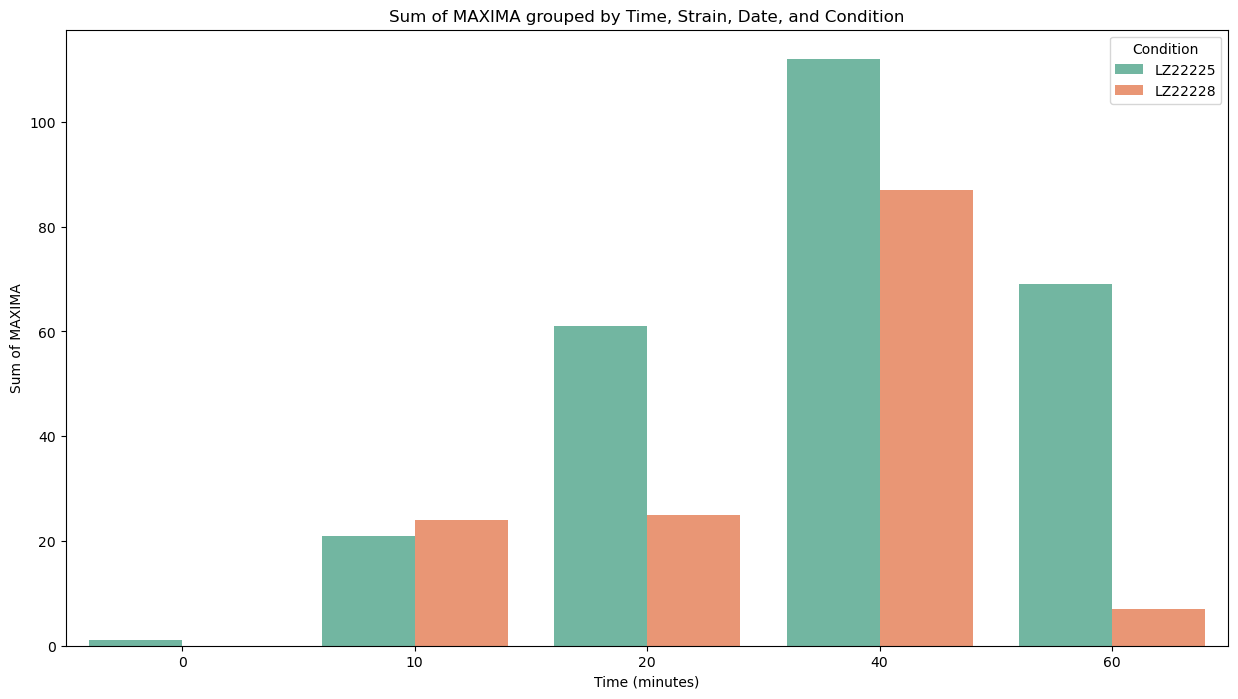

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sum of 'MAXIMA' for each group
grouped_data_sum_reset = grouped_data_sum.reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data_sum_reset, x='time', y='MAXIMA', hue='strain', ci=None, 
            palette="Set2", estimator=sum, 
            dodge=True, capsize=.2)
plt.title('Sum of MAXIMA grouped by Time, Strain, Date, and Condition')
plt.ylabel('Sum of MAXIMA')
plt.xlabel('Time (minutes)')
plt.legend(title='Condition')
plt.show()